### **CSE All-Share Historical Data**


Step 1: Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error


Mout the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Comes to working directory

In [ ]:
import os

In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Deep Learning Project 02")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Deep Learning Project 02'

Step 2: Load and Prepare the Data

In [ ]:
# Load the dataset
df = pd.read_csv('CSE All-Share Historical Data.csv')

# Assuming 'Price' is the column you want to predict
# Remove commas in the 'Price' column and convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on (80% of the dataset)
training_data_len = math.ceil(len(dataset) * .8)



In [ ]:
dataset

array([[10655.35],
       [10649.3 ],
       [10638.06],
       ...,
       [ 5991.29],
       [ 5997.12],
       [ 5973.46]])

Step 3: Scale the Data

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



Step 4: Create the Training Dataset

In [ ]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


Step 5: Build and Train the LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


885/885 [==============================] - 43s 44ms/step - loss: 0.0030


Step 6: Create the Testing Dataset

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Step 7: Get the Models Predicted Price Values

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling


8/8 [==============================] - 2s 23ms/step


Step 8: Evaluate the Model

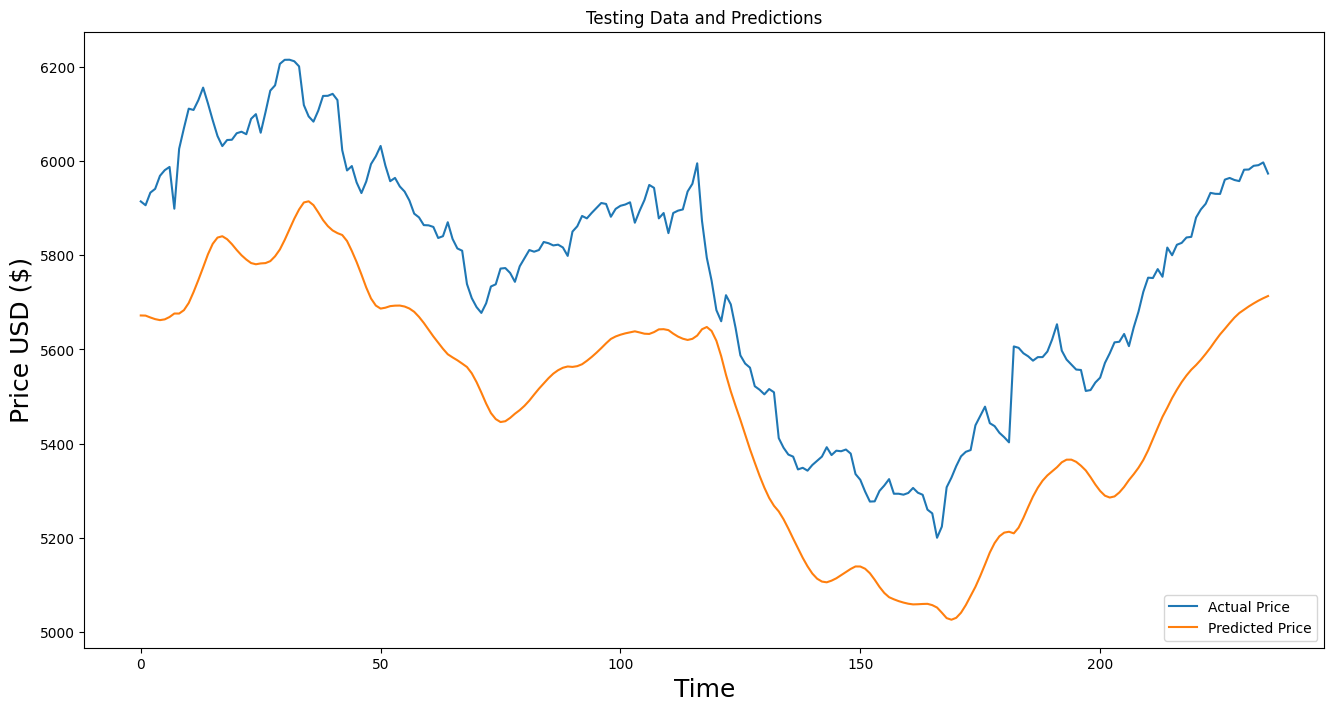

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Extract the actual prices for the test period
test_actual = data[training_data_len:].values

plt.figure(figsize=(16,8))
plt.title('Testing Data and Predictions')
plt.xlabel('Time', fontsize=18)  # Adjust as per your dataset
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')  # 'predictions' obtained from earlier step
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate the value of RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f"RMSE: {rmse}")


RMSE: 261.94491368180616


<ipython-input-25-29e26cdc0126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions  # Ensure this line matches your predictions variable


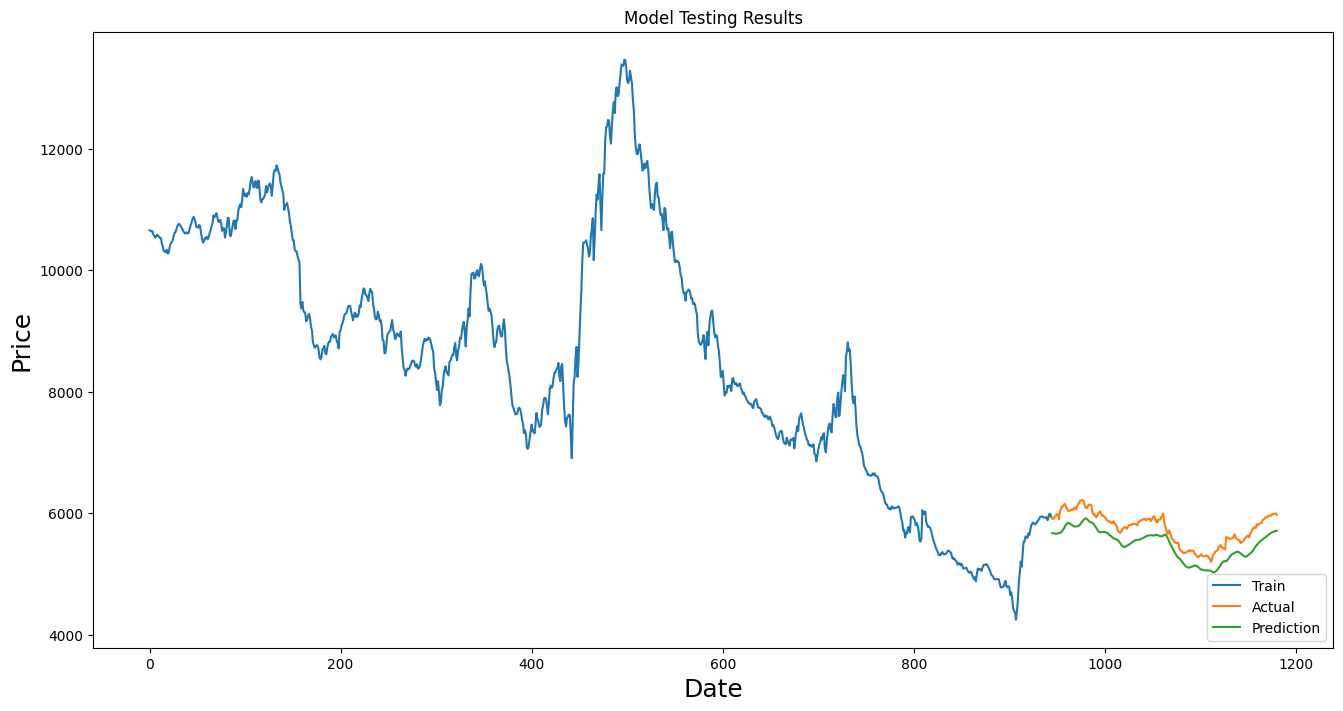

In [ ]:
# Plotting testing data and predictions
valid['Predictions'] = predictions  # Ensure this line matches your predictions variable

plt.figure(figsize=(16,8))
plt.title('Model Testing Results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Actual', 'Prediction'], loc='lower right')
plt.show()
